In [2]:
import numpy as np

import pandas as pd

from statsmodels.tsa.stattools import acf, pacf

import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


In [3]:
# This small stationary-like series makes it easy to calculate ACF and PACF manually
x = np.array([3, 4, 2, 5, 1, 3], dtype=float)
x

array([3., 4., 2., 5., 1., 3.])

In [4]:
# ----- Manual ACF Calculation -----
# Step 1: Center the data (subtract mean)
x_centered = x - x.mean()
x_centered

array([ 0.,  1., -1.,  2., -2.,  0.])

In [5]:
# Step 2: Denominator (sum of squared deviations)
den = np.sum(x_centered**2)
den

10.0

In [6]:
# Step 3: Lag 1 correlation
num_lag1 = np.sum(x_centered[1:] * x_centered[:-1])
rho1_manual = num_lag1 / den
rho1_manual

-0.7

In [7]:
# Step 4: Lag 2 correlation
num_lag2 = np.sum(x_centered[2:] * x_centered[:-2])
rho2_manual = num_lag2 / den

print("Manual ACF lag1:", rho1_manual)
print("Manual ACF lag2:", rho2_manual)



Manual ACF lag1: -0.7
Manual ACF lag2: 0.4


In [8]:
# ----- Library ACF/PACF for confirmation -----
# acf(..., adjusted=False) uses same denominator style as our manual math
acf_vals = acf(x, nlags=2, fft=False, adjusted=False)
pacf_vals = pacf(x, nlags=2, method='ywm')

print("statsmodels ACF[1], ACF[2]:", acf_vals[1], acf_vals[2])
print("statsmodels PACF[1], PACF[2]:", pacf_vals[1], pacf_vals[2])


statsmodels ACF[1], ACF[2]: -0.7000000000000001 0.39999999999999997
statsmodels PACF[1], PACF[2]: -0.7000000000000001 -0.17647058823529427


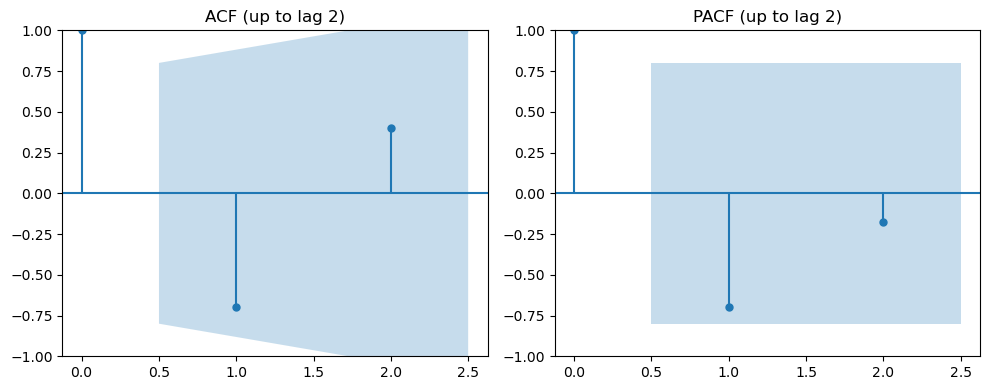

In [24]:
# ----- Visual ACF/PACF -----
# For n=6, maximum lags allowed = < n/2 = < 3
fig, axes = plt.subplots(1, 2, figsize=(10,4))
plot_acf(x, lags=2, ax=axes[0])  # limit to lag 2
axes[0].set_title("ACF (up to lag 2)")

plot_pacf(x, lags=2, method='ywm', ax=axes[1])  # limit to lag 2
axes[1].set_title("PACF (up to lag 2)")

plt.tight_layout()
plt.show()


### Reading the ACF Plot

X-axis → Lag number (1, 2, …).

Y-axis → Correlation value (between −1 and +1).

Bars → Height = strength of correlation at that lag.

Shaded blue region → Confidence interval (~95%). If a bar extends beyond this band, it’s statistically significant.

In our example (n=6):

Lag 1: Bar is at −0.7 (strong negative correlation) → Means consecutive months tend to move in opposite directions.

Lag 2: Bar is at +0.4 (positive correlation) → Means two months apart are somewhat positively related.

Bars within the shaded area → likely due to random noise, not a real pattern.

### Reading the PACF Plot

Same structure (lags on X, correlation on Y).

PACF removes indirect effects — shows only the direct influence of that lag on the current value.

In our example:

Lag 1: PACF matches ACF (−0.7) because no intermediate lag to remove.

Lag 2: PACF drops to around −0.176 (small and inside the blue band) → The positive ACF(2) was mostly due to the chain link through lag 1, not a direct effect.

### Observation Hint

Look for bars sticking out of the shaded band — these are significant lags.

If PACF cuts off after lag p, it suggests an AR(p) model.

If ACF cuts off after lag q, it suggests an MA(q) model.

Here, PACF has a big spike only at lag 1 → AR(1)-like behavior. But since this is a tiny dataset, we shouldn’t overfit.

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


In [10]:
# Create a realistic sales series (5 years of monthly data)
np.random.seed(42)
dates = pd.date_range(start="2018-01-01", periods=60, freq="M")
dates

DatetimeIndex(['2018-01-31', '2018-02-28', '2018-03-31', '2018-04-30',
               '2018-05-31', '2018-06-30', '2018-07-31', '2018-08-31',
               '2018-09-30', '2018-10-31', '2018-11-30', '2018-12-31',
               '2019-01-31', '2019-02-28', '2019-03-31', '2019-04-30',
               '2019-05-31', '2019-06-30', '2019-07-31', '2019-08-31',
               '2019-09-30', '2019-10-31', '2019-11-30', '2019-12-31',
               '2020-01-31', '2020-02-29', '2020-03-31', '2020-04-30',
               '2020-05-31', '2020-06-30', '2020-07-31', '2020-08-31',
               '2020-09-30', '2020-10-31', '2020-11-30', '2020-12-31',
               '2021-01-31', '2021-02-28', '2021-03-31', '2021-04-30',
               '2021-05-31', '2021-06-30', '2021-07-31', '2021-08-31',
               '2021-09-30', '2021-10-31', '2021-11-30', '2021-12-31',
               '2022-01-31', '2022-02-28', '2022-03-31', '2022-04-30',
               '2022-05-31', '2022-06-30', '2022-07-31', '2022-08-31',
      

In [11]:
# Components
trend = np.linspace(100, 200, 60)  # upward trend
seasonality = 10 * np.sin(2 * np.pi * dates.month / 12)  # yearly seasonal effect
noise = np.random.normal(0, 5, 60)  # random noise
noise

array([ 2.48357077, -0.69132151,  3.23844269,  7.61514928, -1.17076687,
       -1.17068478,  7.89606408,  3.83717365, -2.34737193,  2.71280022,
       -2.31708846, -2.32864877,  1.20981136, -9.56640122, -8.62458916,
       -2.81143765, -5.0641556 ,  1.57123666, -4.54012038, -7.06151851,
        7.32824384, -1.1288815 ,  0.33764102, -7.12374093, -2.72191362,
        0.55461295, -5.75496789,  1.87849009, -3.00319345, -1.45846875,
       -3.00853306,  9.26139092, -0.06748612, -5.28855464,  4.11272456,
       -6.10421825,  1.04431798, -9.79835062, -6.64093024,  0.98430618,
        3.6923329 ,  0.85684141, -0.57824141, -1.50551848, -7.39260995,
       -3.59922104, -2.30319385,  5.28561113,  1.71809145, -8.81520078,
        1.62041985, -1.9254114 , -3.38461   ,  3.05838144,  5.15499761,
        4.6564006 , -4.19608762, -1.54606188,  1.65631716,  4.87772564])

In [13]:
# Combine into a sales series
sales = trend + seasonality + noise
df = pd.DataFrame({"Sales": sales}, index=dates)
df.head()

,Sales
2018-01-31,107.483571
2018-02-28,109.663848
2018-03-31,116.628273
2018-04-30,121.360149
2018-05-31,110.608894


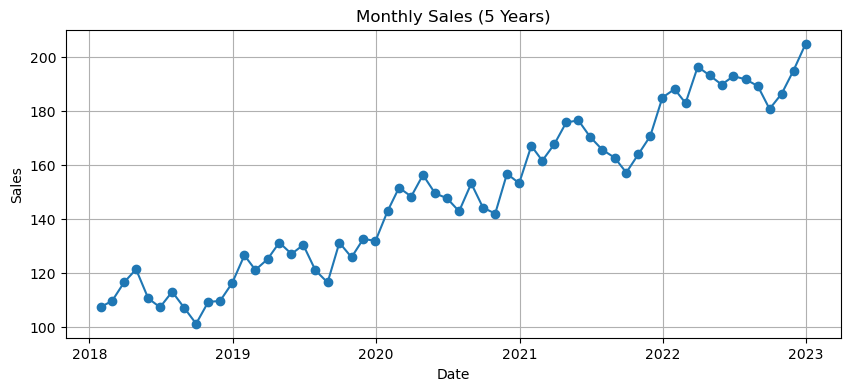

In [14]:
# Plot the original series
plt.figure(figsize=(10,4))
plt.plot(df.index, df["Sales"], marker='o')
plt.title("Monthly Sales (5 Years)")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.grid(True)
plt.show()


In [16]:
# Make the series stationary (remove trend & seasonality)
df["Sales_diff"] = df["Sales"].diff(12)  # seasonal differencing
df_stationary = df["Sales_diff"].dropna()
df_stationary.head()

2019-01-31    19.065224
2019-02-28    11.463903
2019-03-31     8.475951
2019-04-30     9.912396
2019-05-31    16.445594
Freq: M, Name: Sales_diff, dtype: float64

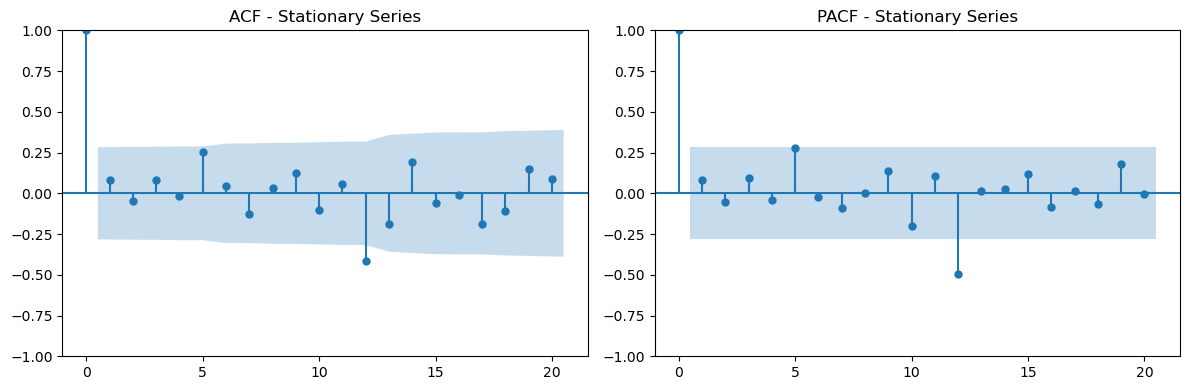

In [17]:
#  Plot ACF & PACF for the stationary series
# After differencing: 60 - 12 = 48 data points → max lags allowed for PACF = < 24
fig, axes = plt.subplots(1, 2, figsize=(12,4))
plot_acf(df_stationary, lags=20, ax=axes[0])
axes[0].set_title("ACF - Stationary Series")

plot_pacf(df_stationary, lags=20, method='ywm', ax=axes[1])
axes[1].set_title("PACF - Stationary Series")
plt.tight_layout()
plt.show()


### Observation

ACF Plot (left):

Lag 1: Small positive correlation, but inside blue band → not significant.

No clear large spikes at regular intervals → no strong seasonality remaining.

Correlations at all lags mostly within the blue area → data behaves like white noise after differencing.

PACF Plot (right):

All spikes inside the blue area → no significant partial autocorrelation at any lag.

No single lag “cuts off” clearly — suggests no strong AR effect.